In [270]:
#필요한 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [271]:
#데이터프레임불러오기
df = pd.read_csv("C:/Users/고유경/Desktop/대외활동/투빅스/과제/1주차/Auction_master_kr/Auction_master_train.csv")

# [EDA]

In [272]:
#살펴보자데이터
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [273]:
df.shape

(1933, 41)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

변수들이 상당히 많다

결측값 처리하고 변수들간 상관관계를 보며 다중회귀에 필요한 변수 selection을 진행해보자

## 1. 결측값 처리

In [275]:
# 결측치 있는 열 확인
df.isnull().sum(axis=0)

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [276]:
#결측치 포함하는 열 제거
df.dropna(axis=1, inplace=True)
df.shape

(1933, 35)

6개 열 삭제됨

In [277]:
#데이터프레임 모든 열 전부 보기
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
df

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,2017-06-19 00:00:00,2017-06-19 00:00:00,낙찰,Private,서울,도봉구,창동,N,삼성 110동 15층 1501호,아파트,1992-08-29 00:00:00,21,15,N,노해로66길,2017-08-30 00:00:00,배당,37.648810,127.048683,402500000
1929,1295,임의,일반,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,2017-02-13 00:00:00,2017-03-13 00:00:00,낙찰,중소기업은행,서울,노원구,상계동,N,상계불암대림 205동 23층 2303호,아파트,2000-05-30 00:00:00,23,23,N,덕릉로94길,2017-05-24 00:00:00,배당,37.663291,127.077063,430234600
1930,254,임의,일반,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,2017-12-21 00:00:00,2018-01-18 00:00:00,낙찰,우리은행,서울,중구,회현동1가,N,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",주상복합,2011-12-13 00:00:00,32,19,N,소공로,2018-03-29 00:00:00,배당,37.558319,126.981994,1118999990
1931,1486,강제,일반,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,2016-10-10 00:00:00,2016-11-14 00:00:00,낙찰,Private,서울,도봉구,쌍문동,N,삼성래미안 110동 11층 1102호,아파트,2002-11-07 00:00:00,15,11,N,우이천로,2017-01-24 00:00:00,배당,37.647061,127.028002,403000000


In [260]:
#날짜형변수 이상치 제거(지난주에 하면서 날짜변수에 이상치 있는걸 발견해서 이번주엔 처음부터 데이터프레임에서 날짜변수 이상치 날려버렸습니다)

In [261]:
min(df.Appraisal_date) #여긴 없고

'2010-06-27 00:00:00'

In [262]:
min(df.First_auction_date) #여기도 없고

'2011-06-21 00:00:00'

In [263]:
min(df.Final_auction_date) #여기도 없다

'2016-04-01 00:00:00'

In [264]:
min(df.Preserve_regist_date)

'1111-11-11 00:00:00'

1111년이라는 이상치 존재

In [265]:
#이상치 개수 확인 
len(df[df.Preserve_regist_date =='1111-11-11 00:00:00'])

43

In [266]:
min(df.Close_date)

'1111-11-11 00:00:00'

이 feature에도 이상치 존재

In [267]:
#이상치 개수 확인 
len(df[df.Close_date =='1111-11-11 00:00:00'])

12

In [278]:
#시간포함되어있는 날짜변수들 날짜형변수로 바꿔주기(바꿔주면 기존 이상치들은 na값으로 변환되더라구요)
datelist= ['Appraisal_date','First_auction_date','Final_auction_date','Preserve_regist_date','Close_date']
for date in datelist:
    df[date]=pd.to_datetime(df[date],errors='coerce')
    
df

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14,45,5,N,해운대해변로,2018-06-14,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16,70,51,N,마린시티2로,2017-03-30,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31,15,14,N,모라로110번길,2017-12-13,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13,20,11,N,황령대로319번가길,2017-12-27,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27,7,7,N,오작로,2016-10-04,배당,35.099630,128.998874,158660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,2017-06-19,2017-06-19,낙찰,Private,서울,도봉구,창동,N,삼성 110동 15층 1501호,아파트,1992-08-29,21,15,N,노해로66길,2017-08-30,배당,37.648810,127.048683,402500000
1929,1295,임의,일반,200000000,삼상감정,2015-02-21,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,2017-02-13,2017-03-13,낙찰,중소기업은행,서울,노원구,상계동,N,상계불암대림 205동 23층 2303호,아파트,2000-05-30,23,23,N,덕릉로94길,2017-05-24,배당,37.663291,127.077063,430234600
1930,254,임의,일반,354805459,서초감정,2016-10-21,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,2017-12-21,2018-01-18,낙찰,우리은행,서울,중구,회현동1가,N,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",주상복합,2011-12-13,32,19,N,소공로,2018-03-29,배당,37.558319,126.981994,1118999990
1931,1486,강제,일반,80000000,한미감정,2016-06-17,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,2016-10-10,2016-11-14,낙찰,Private,서울,도봉구,쌍문동,N,삼성래미안 110동 11층 1102호,아파트,2002-11-07,15,11,N,우이천로,2017-01-24,배당,37.647061,127.028002,403000000


In [279]:
#결측값 제거를 위해 결측치 확인
df.isnull().sum(axis=0)

Auction_key                     0
Auction_class                   0
Bid_class                       0
Claim_price                     0
Appraisal_company               0
Appraisal_date                  0
Auction_count                   0
Auction_miscarriage_count       0
Total_land_gross_area           0
Total_land_real_area            0
Total_land_auction_area         0
Total_building_area             0
Total_building_auction_area     0
Total_appraisal_price           0
Minimum_sales_price             0
First_auction_date              0
Final_auction_date              0
Final_result                    0
Creditor                        0
addr_do                         0
addr_si                         0
addr_dong                       0
addr_san                        0
addr_etc                        0
Apartment_usage                 0
Preserve_regist_date           43
Total_floor                     0
Current_floor                   0
Share_auction_YorN              0
road_name     

보존등기일(Preserve_regist_date)와 종국일자(Close_date)에 각각 43개, 12개 결측치 존재 확인

이 두가지 열을 날리기보다는 결측값 포함하는 행을 제거하자

In [280]:
#날짜형변수에서 발생한 결측치 처리 ->na값있는 행 전부 날리기
df.dropna(axis=0, inplace=True)
df.shape

(1879, 35)

In [281]:
#결측치 없는지 다시 확인
df.isnull().sum(axis=0)

Auction_key                    0
Auction_class                  0
Bid_class                      0
Claim_price                    0
Appraisal_company              0
Appraisal_date                 0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_gross_area          0
Total_land_real_area           0
Total_land_auction_area        0
Total_building_area            0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
First_auction_date             0
Final_auction_date             0
Final_result                   0
Creditor                       0
addr_do                        0
addr_si                        0
addr_dong                      0
addr_san                       0
addr_etc                       0
Apartment_usage                0
Preserve_regist_date           0
Total_floor                    0
Current_floor                  0
Share_auction_YorN             0
road_name                      0
Close_date

In [282]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,부산,해운대구,우동,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14,45,5,N,해운대해변로,2018-06-14,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,부산,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16,70,51,N,마린시티2로,2017-03-30,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,부산,사상구,모라동,N,백양그린 206동 14층 1403호,아파트,1992-07-31,15,14,N,모라로110번길,2017-12-13,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,부산,남구,대연동,N,대연청구 109동 11층 1102호,아파트,2001-07-13,20,11,N,황령대로319번가길,2017-12-27,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,부산,사하구,괴정동,N,동조리젠시 7층 703호,아파트,2001-11-27,7,7,N,오작로,2016-10-04,배당,35.099630,128.998874,158660000


## 2. 시각화

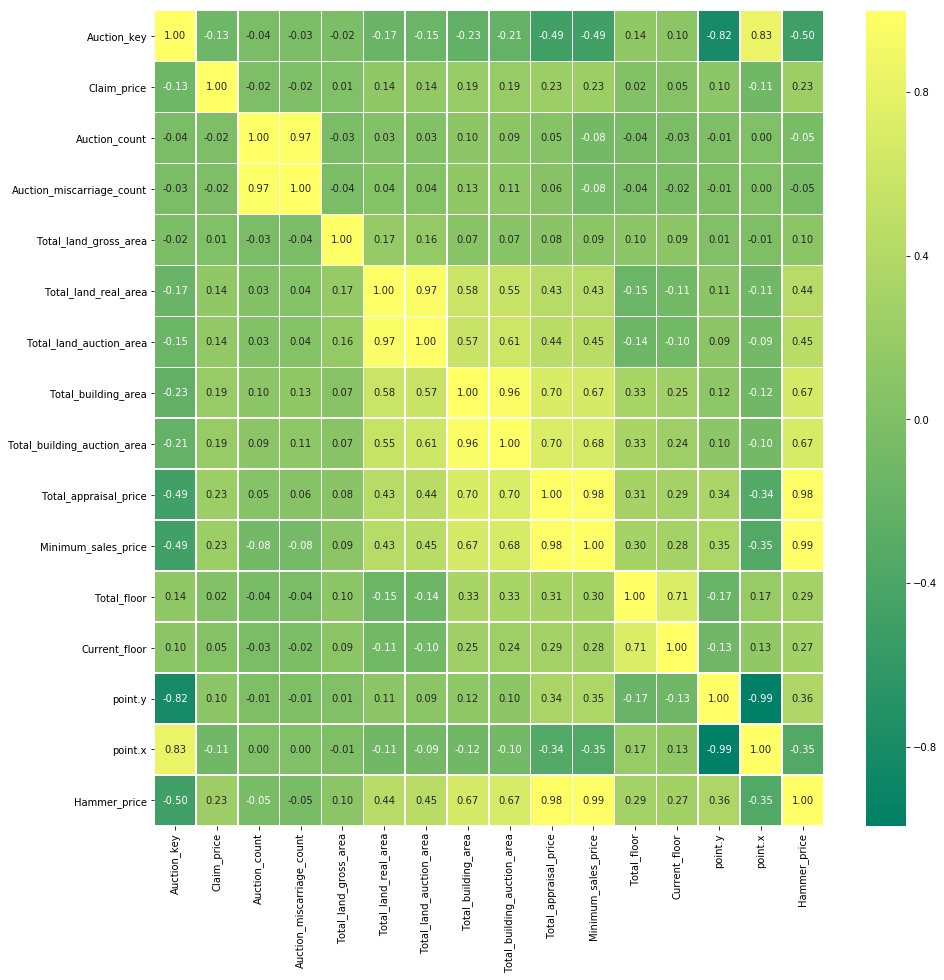

In [79]:
#모든 연속형 변수 간의 상관관계 히트맵
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot= True, fmt='.2f', linewidths=.5, cmap='summer')
plt.show()

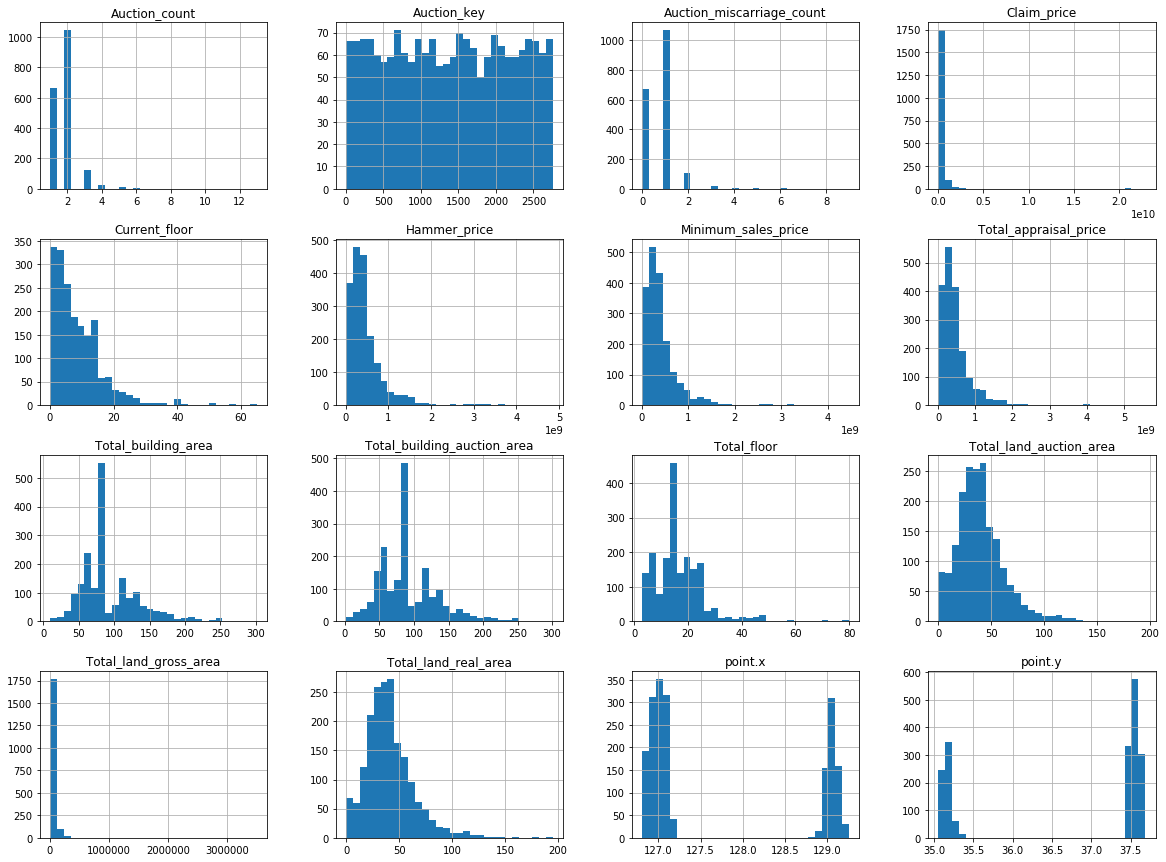

In [80]:
#모든 연속형 변수 분포 히스토그램으로 나타내기
df.hist(bins=30,figsize=(20,15))
plt.show()

In [283]:
#타겟변수인 hammer_price와 상관관계 높은 변수들 나열
df.corr()['Hammer_price'].sort_values(ascending=False)

Hammer_price                   1.000000
Minimum_sales_price            0.992131
Total_appraisal_price          0.979849
Total_building_auction_area    0.673325
Total_building_area            0.666700
Total_land_auction_area        0.451857
Total_land_real_area           0.436697
point.y                        0.355671
Total_floor                    0.294574
Current_floor                  0.273948
Claim_price                    0.234086
Total_land_gross_area          0.095379
Auction_miscarriage_count     -0.048715
Auction_count                 -0.053555
point.x                       -0.354968
Auction_key                   -0.499853
Name: Hammer_price, dtype: float64

타겟변수(hammer price)와 비슷한 종류의 변수인 price를 제외하고 타겟변수와 높은 상관성을 지닌 면적(area) 변수 확인

여러 갈래를 나누어서 면적 위주로 데이터 시각화해보기

In [284]:
#plot에 한글 나타나게 하는 코드
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### 1) 총건물경매면적 대비 낙찰가 분포

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


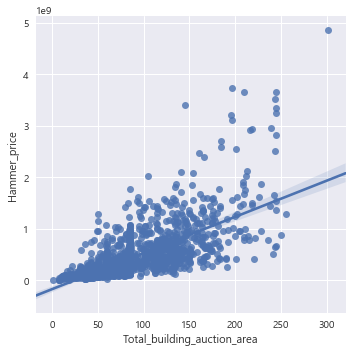

In [100]:
#타겟변수 낙찰가와 상관계수 높은 (0.673325) 총건물경매면적 변수
sns.lmplot(x='Total_building_auction_area',y='Hammer_price', data=df)
plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


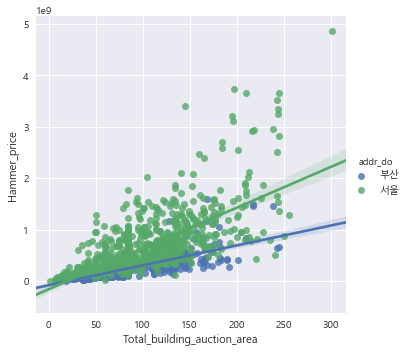

In [98]:
#이번엔 서울,부산 나눠서 총건물경매면적 대비 낙찰가 분포 비교
sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=df)

서울이 부산보다 면적 대비 낙찰가 상승폭 큼

### 2) 건물종류 별 총건물경매면적 대비 낙찰가 분포

In [101]:
#건물종류 확인
df['Apartment_usage'].unique()

array(['주상복합', '아파트'], dtype=object)

In [102]:
#각 개수 확인
df['Apartment_usage'].value_counts()

아파트     1623
주상복합     256
Name: Apartment_usage, dtype: int64

아파트 비중이 훨씬 큼

In [285]:
#주상복합, 아파트별 데이터프레임 새로 생성
multi = df.groupby('Apartment_usage').get_group('주상복합')
multi = multi.reset_index(drop=True)
apart = df.groupby('Apartment_usage').get_group('아파트')
apart = apart.reset_index(drop=True)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


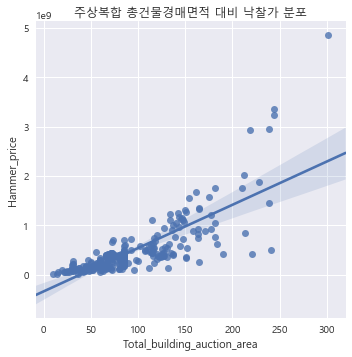

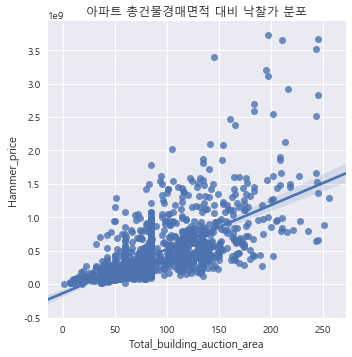

In [286]:
#건물종류 별 총건물경매면적 대비 낙찰가 분포 

#주상복합 plot
sns.lmplot(x='Total_building_auction_area',y='Hammer_price', data=multi)
plt.title('주상복합 총건물경매면적 대비 낙찰가 분포')
plt.show()

#아파트 plot
sns.lmplot(x='Total_building_auction_area',y='Hammer_price', data=apart)
plt.title('아파트 총건물경매면적 대비 낙찰가 분포')
plt.show()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


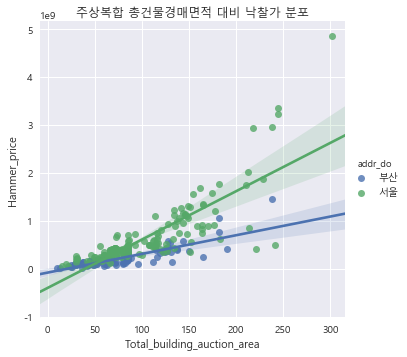

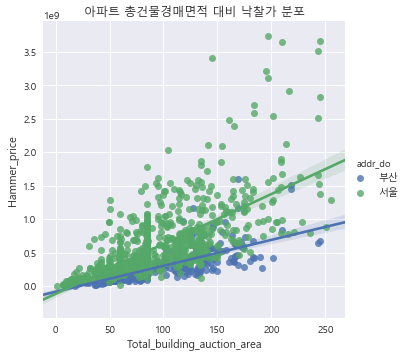

In [105]:
#이번엔 서울,부산 나눠서 건물종류 별 총건물경매면적 대비 낙찰가 분포 보기

#주상복합 plot
sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=multi)
plt.title('주상복합 총건물경매면적 대비 낙찰가 분포')
plt.show()

#아파트 plot
sns.lmplot(x='Total_building_auction_area',y='Hammer_price',hue='addr_do',data=apart)
plt.title('아파트 총건물경매면적 대비 낙찰가 분포')
plt.show()

### 3) 서울, 부산 지역구별 낙찰가 분포

In [287]:
#부산,서울 각각의 데이터프레임 생성
busan = df.groupby('addr_do').get_group('부산')
busan = busan.reset_index(drop=True)
seoul = df.groupby('addr_do').get_group('서울')
seoul = seoul.reset_index(drop=True)

In [288]:
#낙찰가 최소, 최댓값 지정
M = max(df.Hammer_price)
m = min(df.Hammer_price)

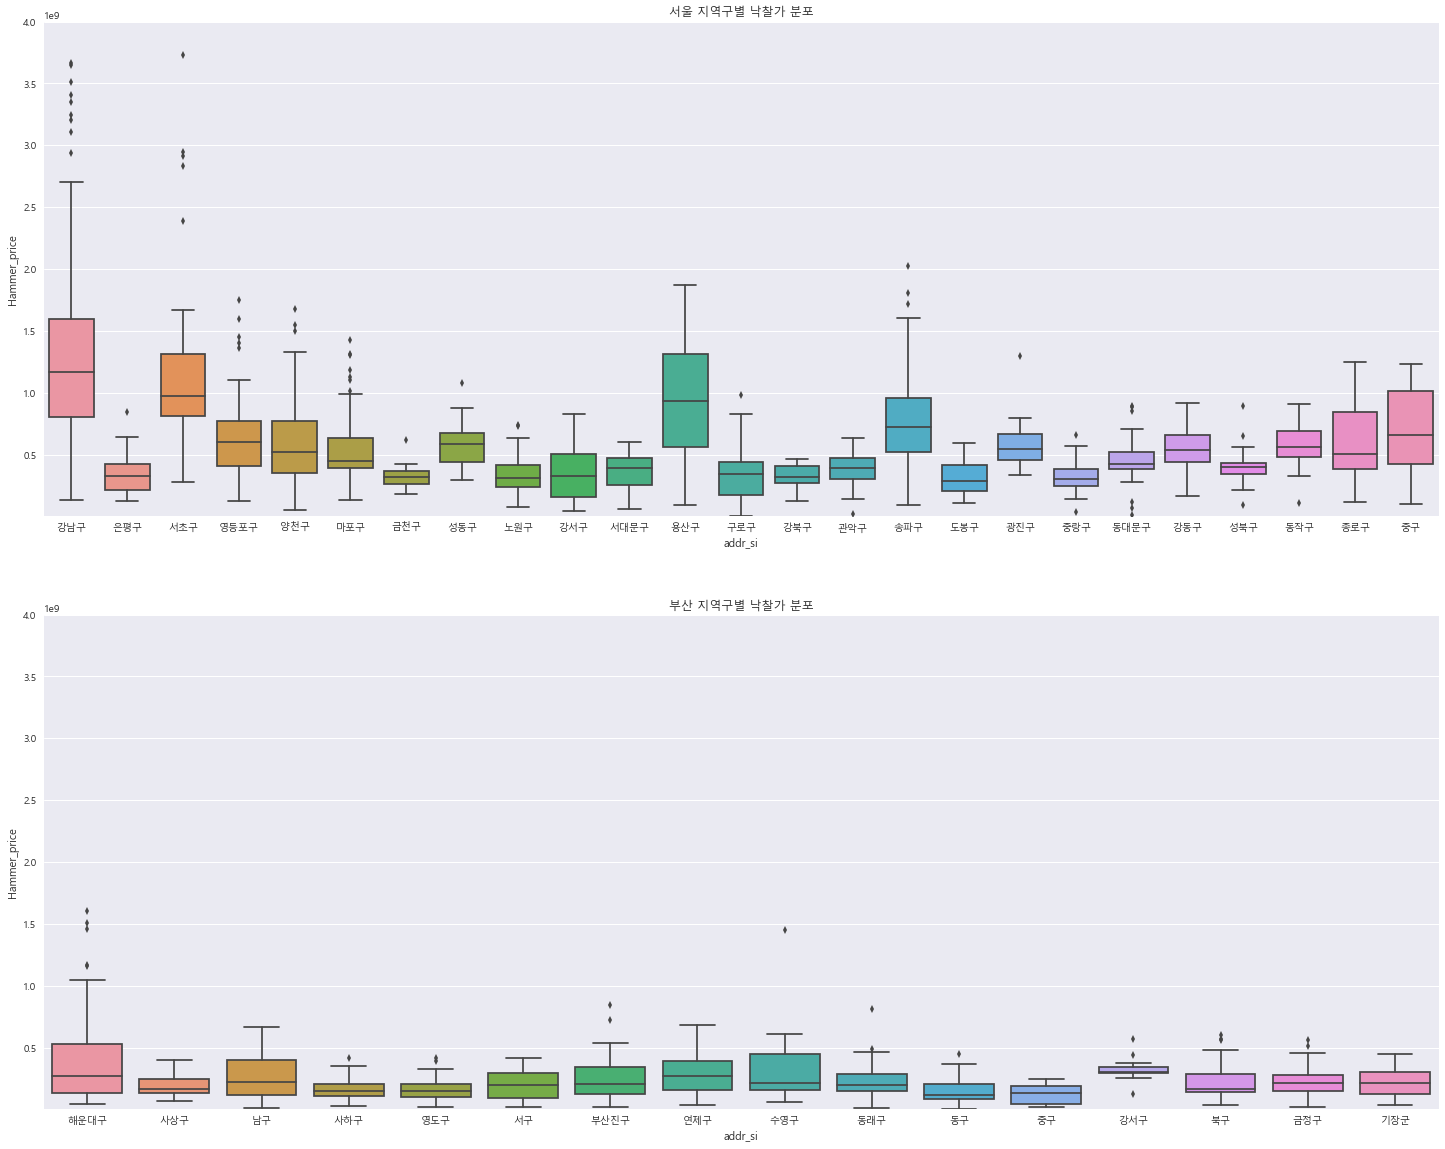

In [110]:
f,ax=plt.subplots(2,1,figsize = (25,20))

#1번플롯(서울)
ax[0] = plt.subplot(2,1,1)
ax[0] = sns.boxplot(x="addr_si", y="Hammer_price", data=seoul)
ax[0].set_ylim(m,4000000000) #y축통일
ax[0] = plt.title('서울 지역구별 낙찰가 분포')


#2번플롯(부산)
ax[1] = plt.subplot(2,1,2)
ax[1] = sns.boxplot(x="addr_si", y="Hammer_price", data=busan)
ax[1].set_ylim(m,4000000000) #y축통일
ax[1] = plt.title('부산 지역구별 낙찰가 분포')
#ax[1] = plt.figure(figsize=(10,10))


plt.show()

확실히 부산보다 서울의 낙찰가가 훨씬 높게 분포하며, 서울은 강남,용산,서초의 높은 낙찰가 분포를 확인할 수 있다

### 4) 총층수,해당층수 대비 낙찰가 분포

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


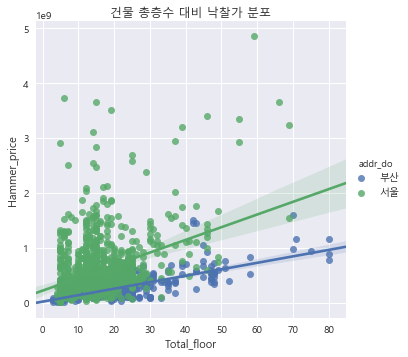

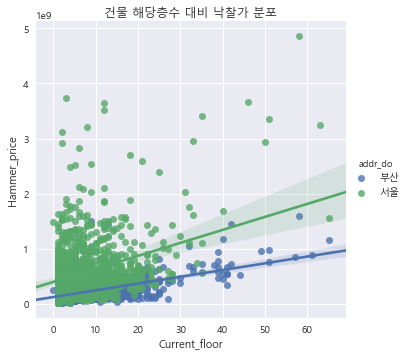

In [112]:
#총층수
sns.lmplot(x='Total_floor',y='Hammer_price',hue='addr_do',data=df)
plt.title('건물 총층수 대비 낙찰가 분포')
plt.show()

#해당층수
sns.lmplot(x='Current_floor',y='Hammer_price',hue='addr_do',data=df)
plt.title('건물 해당층수 대비 낙찰가 분포')
plt.show()

나름의 선형관계를 가진다고 볼 수 있을듯...

## 3. 전처리

## * 변수생성

### 1) 채권자종류 (Type_creditor)



creditor변수를 살펴보니 상당히 많은 금융권과 회사 종류 -> 제1,2,3금융권,기타로 단순화하여 새로운 변수 생성

In [128]:
#creditor은 채권자,경매신청인
len(df['Creditor'].unique())

440

In [129]:
df['Creditor'].unique()

array(['베리타스자산관리대부', '흥국저축은행', '국민은행', '고려저축은행', 'Private', '서울보증보험',
       '천마(새)', '대형선망수협', '디에이치대부', '코카콜라음료', '한화저축은행', '프라임대부', '대부F&D',
       'HK저축은행', '부산은행', '농협은행', '청룡동(새)', '케이에이제7차유동화전문', '신용보증기금',
       '반야월농협', '제이티캐피탈', '오케이캐피탈대부', '우리은행', '대구은행', '삼성카드', '영진건설',
       '한화손해보험', '하나은행', '유진대부금융', '동부화재해상보험', '비에스금융대부', '(주)티베이',
       '범일5동(새)', '기술보증기금', '중소기업은행', '신한카드', '해운대신협', '승학(새)', '승학신협',
       '두산건설', '동래농협', '농협생명보험', '한국주택금융공사', '현대캐피탈', 'NH농협캐피탈', '신한생명보험',
       '동부산농협', '경북대구낙농협', '부영벽산아파트입주자대표회의', '한국씨티은행', 'KB국민카드', '디지비캐피탈',
       '베스트피플대부', '세종상호저축은행', '경남은행', '북부산(새)', '한국무역보험공사', '스카이저축은행',
       '에이치에스제일차유동화전문', '영우유통', '명륜동(새)', '구서2동(새)', '남천천신협', '부곡동(새)',
       '한화생명보험', '영남자원', '비엔케이캐피탈', '대양석유(주)', '부산주례(새)', '대청(새)',
       '중부(새)', '기술신용보증기금', '범일동(새)', '경산농협', '국제저축은행', '그랜드코리아레저',
       '부산동부신협', '신한은행', '웰릭스에프앤아이대부', '대구태영신협', '부산평화(새)', '진주서부농협',
       '감천1동(새)', '제1,2구잠수기수협', '농소농협', 'SC은행', '진해수협', '서1동(새)', '현대모비스',
    

In [289]:
#Na값으로 이루어진 열 생성
df['Type_creditor'] = np.nan

In [290]:
#제1금융권
df['Type_creditor'][df.Creditor.str.contains("은행")] = "제1금융권"

#제2금융권
df['Type_creditor'][df.Creditor.str.contains("저축")] = "제2금융권"
df['Type_creditor'][df.Creditor.str.contains("신협")] = "제2금융권"
df['Type_creditor'][df.Creditor.str.contains("농협")] = "제2금융권"
df['Type_creditor'][df.Creditor.str.contains("농협은행")] = "제1금융권" #특수경우 제외시키기
df['Type_creditor'][df.Creditor.str.contains("수협")] = "제2금융권"
df['Type_creditor'][df.Creditor.str.contains("축협")] = "제2금융권"
df['Type_creditor'][df.Creditor.str.contains("보험")] = "제2금융권"
df['Type_creditor'][df.Creditor.str.contains("카드")] = "제2금융권"
df['Type_creditor'][df.Creditor.str.contains("캐피탈")] = "제2금융권"

#제3금융권
df['Type_creditor'][df.Creditor.str.contains("대부")] = "제3금융권"

#Private(기존에 공개되지 않은 값들이라 그대로 유지)
df['Type_creditor'][df.Creditor.str.contains("Private")] = "Private"


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [291]:
#분류안된 나머지 변수들은 기타로 묶기
df['Type_creditor'].fillna("기타", inplace=True)

In [292]:
#결측값 없는지 확인
df['Type_creditor'].isnull().sum()

0

In [293]:
df.loc[:,['Type_creditor']]

,Type_creditor
0,제3금융권
1,제2금융권
2,제1금융권
3,제2금융권
4,Private
...,...
1928,Private
1929,제1금융권
1930,제1금융권
1931,Private


### 2) 경매기간 (Auction_period)

In [294]:
df['Auction_period'] = df['Final_auction_date'] - df['First_auction_date']
df['Auction_period']

0       35 days
1       35 days
2       77 days
3      105 days
4       28 days
         ...   
1928     0 days
1929    28 days
1930    28 days
1931    35 days
1932    35 days
Name: Auction_period, Length: 1879, dtype: timedelta64[ns]

timedelta 형식의 값들 days 빼주고 정수로 계산될 수 있게 변환해주기

In [295]:
#dt.days.astype('int16')이용해서 timedelta -> int 변환
df['Auction_period'] = df['Auction_period'].dt.days.astype('int16')

In [296]:
df['Auction_period']

0        35
1        35
2        77
3       105
4        28
       ... 
1928      0
1929     28
1930     28
1931     35
1932     35
Name: Auction_period, Length: 1879, dtype: int16

### 3) 건물나이 (building_age)
감정일자(Appraisal_date) - 보존등기일(Preserve_regist_date)

정확히 어떤 일자를 가지고 건물나이를 계산하기보다는 큰 폭에서 년도수만 추출하여 나이 계산

In [297]:
#apply, lambda 활용하여 년도만 추출해서 빼기
df['building_age'] = df['Appraisal_date'].apply(lambda x: x.year) - df['Preserve_regist_date'].apply(lambda x: x.year)
df['building_age']

0        8
1        5
2       24
3       15
4       15
        ..
1928    25
1929    15
1930     5
1931    14
1932     2
Name: building_age, Length: 1879, dtype: int64

### 4) 경매층수높이(Current_total_ratio)
현재층수(Current_floor) / 총층수(Total_floor)


매물의 현재 층수가 해당 건물에서 어느정도의 높이에 해당하는지 보기 위한 변수 

In [298]:
df['Current_total_ratio'] = df['Current_floor']/df['Total_floor']

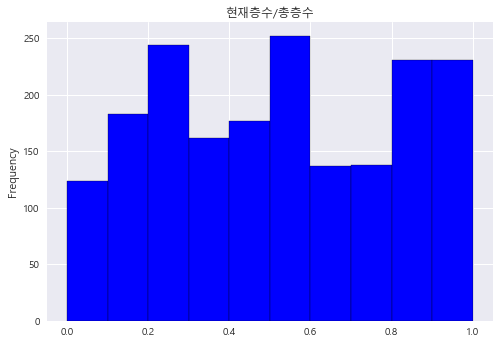

In [299]:
#어느정도 분포를 띄는지 보려고 히스토그랩 찍어봄
df['Current_total_ratio'].plot.hist(bins=10,color='blue',edgecolor='black')
plt.title('현재층수/총층수')
plt.show()

## * Encoding

### 1) addr_do (부산, 서울)

In [113]:
#범주 개수 확인
df.addr_do.value_counts()

서울    1211
부산     668
Name: addr_do, dtype: int64

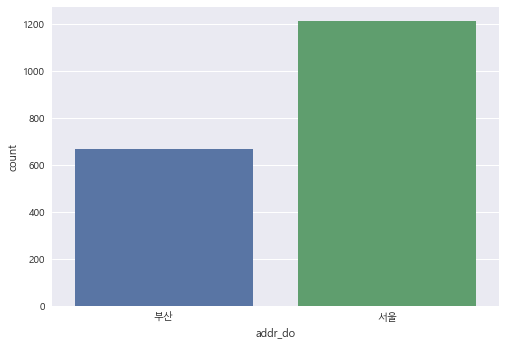

In [115]:
#시각화
sns.countplot(df.addr_do)

In [300]:
#서울을 1, 부산을 0으로 인코딩해주는 함수 구현
def encoding_1 (x):
    if x == '서울':
        return 1
    elif x == '부산':
        return 0

In [301]:
#addr_do 열에 인코딩 함수 apply해주기
df.addr_do = df.addr_do.apply(encoding_1) 

In [302]:
#확인완료
df.addr_do.value_counts()

1    1211
0     668
Name: addr_do, dtype: int64

### 2) Apartment_usage (아파트, 주상복합)

In [121]:
#범주 개수 확인
df.Apartment_usage.value_counts()

아파트     1623
주상복합     256
Name: Apartment_usage, dtype: int64

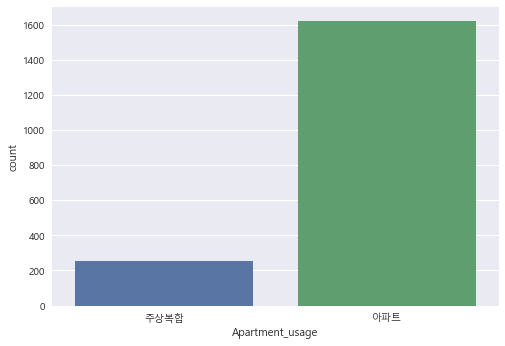

In [123]:
#시각화
sns.countplot(df.Apartment_usage)

In [303]:
#주상복합을 1, 아파트를 0으로 인코딩해주는 함수 구현
def encoding_2 (x):
    if x == '주상복합':
        return 1
    elif x == '아파트':
        return 0

In [304]:
#addr_do 열에 인코딩 함수 apply해주기
df.Apartment_usage = df.Apartment_usage.apply(encoding_2) 

In [305]:
#확인완료
df.addr_do.value_counts()

1    1211
0     668
Name: addr_do, dtype: int64

### 3) Share_auction_YorN (지분경매여부 - Y, N)

하나의 부동산이 전체가 아닌 일부만 경매가 진행

(하나의 부동산의 공유자가 지분으로 소유권을 가지고 있을 때 그중 일부 지분만 경매가 진행)

In [172]:
#범주 개수 확인
df.Share_auction_YorN.value_counts()

N    1802
Y      77
Name: Share_auction_YorN, dtype: int64

In [306]:
#Y를 1, N을 0으로 인코딩해주는 함수 구현
def encoding_3 (x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0

In [307]:
# Share_auction_YorN 열에 인코딩 함수 apply해주기
df.Share_auction_YorN = df.Share_auction_YorN.apply(encoding_3) 

In [308]:
#확인완료
df.Share_auction_YorN.value_counts()

0    1802
1      77
Name: Share_auction_YorN, dtype: int64

### 4) Type_creditor (제 1,2,3금융권, private, 기타)
5개 범주 -> onehotencoding 사용

In [309]:
#범주 개수 확인
df.Type_creditor.value_counts()

제1금융권      560
제2금융권      458
Private    450
기타         350
제3금융권       61
Name: Type_creditor, dtype: int64

In [310]:
t_dummy = pd.get_dummies(df.Type_creditor)
t_dummy.head()

,Private,기타,제1금융권,제2금융권,제3금융권
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [311]:
df = pd.concat([df,t_dummy], axis = 1)

In [312]:
#원핫인코딩했으니 원래 변수 Type_creditor 삭제
df = df.drop('Type_creditor', axis = 1)

In [313]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price,Auction_period,building_age,Current_total_ratio,Private,기타,제1금융권,제2금융권,제3금융권
0,2687,임의,개별,1766037301,정명감정,2017-07-26,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,낙찰,베리타스자산관리대부,0,해운대구,우동,N,해운대엑소디움 5층 101-502호,1,2009-07-14,45,5,0,해운대해변로,2018-06-14,배당,35.162717,129.137048,760000000,35,8,0.111111,0,0,0,0,1
1,2577,임의,일반,152946867,희감정,2016-09-12,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,낙찰,흥국저축은행,0,해운대구,우동,N,해운대두산위브더제니스 103동 51층 5103호,0,2011-12-16,70,51,0,마린시티2로,2017-03-30,배당,35.156633,129.145068,971889999,35,5,0.728571,0,0,0,1,0
2,2197,임의,개별,11326510,혜림감정,2016-11-22,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,낙찰,국민은행,0,사상구,모라동,N,백양그린 206동 14층 1403호,0,1992-07-31,15,14,0,모라로110번길,2017-12-13,배당,35.184601,128.996765,93399999,77,24,0.933333,0,0,1,0,0
3,2642,임의,일반,183581724,신라감정,2016-12-13,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,낙찰,고려저축은행,0,남구,대연동,N,대연청구 109동 11층 1102호,0,2001-07-13,20,11,0,황령대로319번가길,2017-12-27,배당,35.154180,129.089081,256899000,105,15,0.550000,0,0,0,1,0
4,1958,강제,일반,45887671,나라감정,2016-03-07,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,낙찰,Private,0,사하구,괴정동,N,동조리젠시 7층 703호,0,2001-11-27,7,7,0,오작로,2016-10-04,배당,35.099630,128.998874,158660000,28,15,1.000000,1,0,0,0,0


In [177]:
df.shape

(1879, 42)

## * 변수제거

#### 분석에 큰 의미 없다고 판단되는 변수들

1) Auction_key : 경매 아파트 고유 키값 (인덱스와 마찬가지라 영향 없음)

2) Auction_class : 경매구분(강제경매, 임의경매)

3) Bid_class : 입찰구분(일반/개별/일괄)

4) Appraisal_company : 감정사

5) Final_result : 최종결과 (전부 낙찰이라 의미없음)

6) addr_si : 주소_시군구 (부산, 서울로 나뉜 addr_do 제외한 나머지 상세주소는 전부 제거)

7) addr_dong : 주소_읍면동 (위와 동일)

8) addr_san : 주소_산번지 여부 (위와 동일)

9) addr_etc : 주소_기타주소 (위와 동일)

10) road_name : 도로명주소_도로명 (위와 동일)

11) Close_result : 종국결과 (전부 배당이라 의미 없음)

12) point.y : 위도 (위치 좌표는 의미 없다 판단)

13) point.x : 경도 (위와 동일)

In [314]:
#전부 제거
df = df.drop('Auction_key', axis = 1)
df = df.drop('Auction_class', axis = 1)
df = df.drop('Bid_class', axis = 1)
df = df.drop('Appraisal_company', axis = 1)
df = df.drop('Final_result', axis = 1)
df = df.drop('addr_si', axis = 1)
df = df.drop('addr_dong', axis = 1)
df = df.drop('addr_san', axis = 1)
df = df.drop('addr_etc', axis = 1)
df = df.drop('road_name', axis = 1)
df = df.drop('Close_result', axis = 1)
df = df.drop('point.y', axis = 1)
df = df.drop('point.x', axis = 1)
df.head()

,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Creditor,addr_do,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,Close_date,Hammer_price,Auction_period,building_age,Current_total_ratio,Private,기타,제1금융권,제2금융권,제3금융권
0,1766037301,2017-07-26,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13,2018-03-20,베리타스자산관리대부,0,1,2009-07-14,45,5,0,2018-06-14,760000000,35,8,0.111111,0,0,0,0,1
1,152946867,2016-09-12,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29,2017-02-02,흥국저축은행,0,0,2011-12-16,70,51,0,2017-03-30,971889999,35,5,0.728571,0,0,0,1,0
2,11326510,2016-11-22,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28,2017-10-13,국민은행,0,0,1992-07-31,15,14,0,2017-12-13,93399999,77,24,0.933333,0,0,1,0,0
3,183581724,2016-12-13,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20,2017-11-02,고려저축은행,0,0,2001-07-13,20,11,0,2017-12-27,256899000,105,15,0.550000,0,0,0,1,0
4,45887671,2016-03-07,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06,2016-08-03,Private,0,0,2001-11-27,7,7,0,2016-10-04,158660000,28,15,1.000000,1,0,0,0,0


In [316]:
#Type_creditor 변수 생성 했었으니 기존 creditor도 제거
df = df.drop('Creditor', axis = 1)
df.shape

(1879, 29)

In [317]:
#경매기간 feature 생성했으니 기존 날짜변수들 제거
df = df.drop('Appraisal_date', axis = 1)
df = df.drop('First_auction_date', axis = 1)
df = df.drop('Final_auction_date', axis = 1)
df = df.drop('Preserve_regist_date', axis = 1)
df = df.drop('Close_date', axis = 1)

In [318]:
df.shape

(1879, 24)

In [319]:
#타겟변수 hammer_price 제외하고 독립변수들 후보군 데이터프레임 따로 생성
df_X = df.drop('Hammer_price', axis = 1)

In [320]:
#독립변수들 간 상관관계 살피기
df_X.corr()

,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,Auction_period,building_age,Current_total_ratio,Private,기타,제1금융권,제2금융권,제3금융권
Claim_price,1.000000,-0.016701,-0.018709,0.006418,0.139486,0.143850,0.186869,0.188194,0.228802,0.225679,0.105936,-0.016380,0.018738,0.046524,-0.029999,0.000169,-0.006794,0.062391,-0.075679,-0.051040,0.054489,0.063589,-0.000315
Auction_count,-0.016701,1.000000,0.969209,-0.032947,0.032361,0.030821,0.104671,0.093480,0.051697,-0.083022,-0.007672,0.028179,-0.043840,-0.029788,0.024539,0.399722,-0.126171,-0.002358,0.001764,-0.010100,-0.004456,0.008512,0.008819
Auction_miscarriage_count,-0.018709,0.969209,1.000000,-0.038004,0.041769,0.039291,0.128353,0.114274,0.058828,-0.082465,-0.008253,0.032086,-0.035593,-0.022970,0.030382,0.354966,-0.134537,-0.000479,-0.007142,-0.004225,0.002177,0.003050,0.013471
Total_land_gross_area,0.006418,-0.032947,-0.038004,1.000000,0.169108,0.163226,0.072993,0.069112,0.083025,0.093322,0.013921,-0.127434,0.098923,0.094242,-0.001176,-0.010438,0.014049,0.029517,-0.047245,-0.031104,0.086976,-0.010538,-0.016845
Total_land_real_area,0.139486,0.032361,0.041769,0.169108,1.000000,0.968435,0.581097,0.553836,0.429236,0.430313,0.113359,-0.305257,-0.152862,-0.105850,0.004006,0.040958,0.121641,-0.024347,-0.065957,-0.017131,0.115056,-0.037298,-0.010124
Total_land_auction_area,0.143850,0.030821,0.039291,0.163226,0.968435,1.000000,0.566626,0.606432,0.444260,0.445449,0.098567,-0.292594,-0.139169,-0.100443,-0.214477,0.047287,0.090915,-0.029056,-0.073247,-0.037791,0.139549,-0.028383,-0.031993
Total_building_area,0.186869,0.104671,0.128353,0.072993,0.581097,0.566626,1.000000,0.957826,0.699781,0.669124,0.125617,0.021722,0.329653,0.251956,-0.011118,0.092288,-0.129187,0.003224,-0.071039,-0.047931,0.155565,-0.051105,-0.001325
Total_building_auction_area,0.188194,0.093480,0.114274,0.069112,0.553836,0.606432,0.957826,1.000000,0.704376,0.675402,0.105160,0.024311,0.326443,0.243217,-0.271493,0.093590,-0.155785,-0.003382,-0.080325,-0.066639,0.179010,-0.040042,-0.025173
Total_appraisal_price,0.228802,0.051697,0.058828,0.083025,0.429236,0.444260,0.699781,0.704376,1.000000,0.978880,0.355620,0.041048,0.311531,0.292773,-0.106302,0.074141,-0.098998,0.051187,-0.016475,-0.066275,0.136672,-0.077190,0.019532
Minimum_sales_price,0.225679,-0.083022,-0.082465,0.093322,0.430313,0.445449,0.669124,0.675402,0.978880,1.000000,0.362206,0.026718,0.304228,0.284923,-0.109199,0.028306,-0.065401,0.049589,-0.011280,-0.068007,0.138981,-0.083996,0.021354


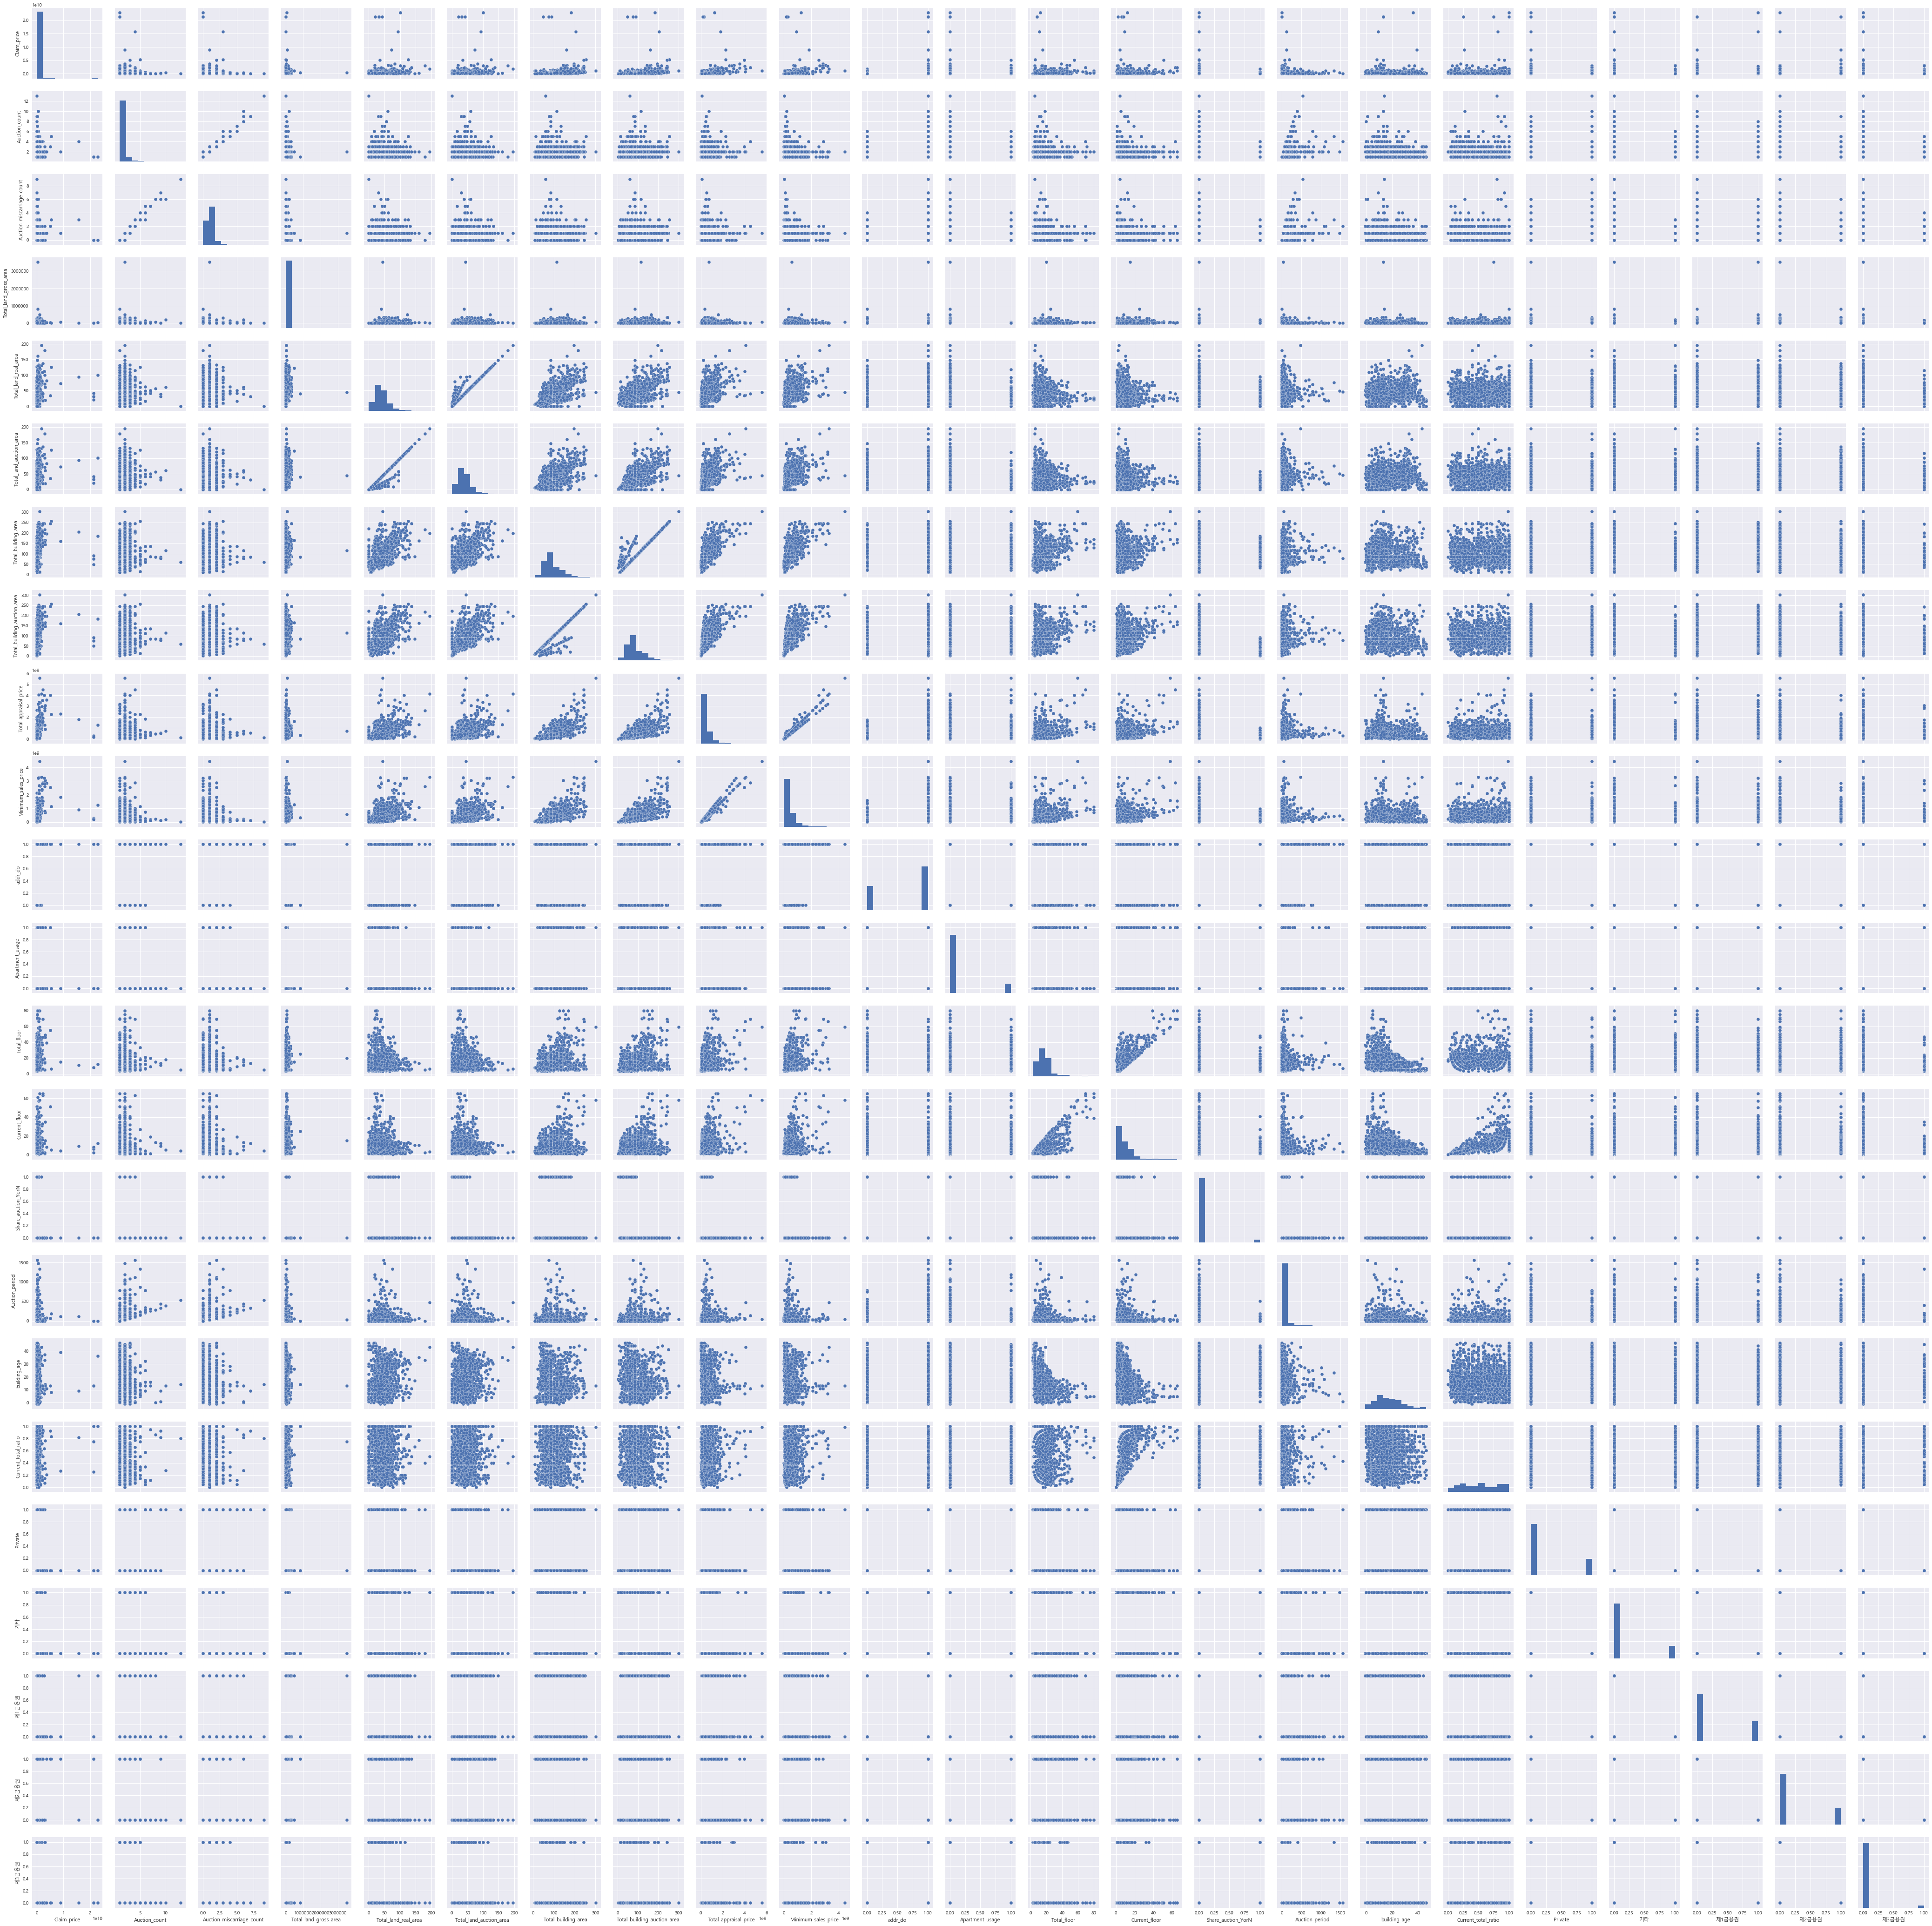

In [321]:
#독립변수들 간 다중공선성 확인을 위해 pairplot 찍어봄
sns.pairplot(df_X)

곳곳에 4~5개 정도 선형관계로 추정되는 변수들이 보임

VIF를 통해 수치로 확인해보자

In [323]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
vif["features"] = df_X.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
7,121.669661,Total_building_auction_area
5,121.253320,Total_land_auction_area
4,115.960697,Total_land_real_area
6,112.331539,Total_building_area
8,48.159586,Total_appraisal_price
9,46.901308,Minimum_sales_price
20,21.924807,제1금융권
2,18.642404,Auction_miscarriage_count
1,17.878089,Auction_count
21,17.578756,제2금융권


10 이상인 변수들 -> 다중공선성 의심

타겟변수와 상관관계 높았던 price, area, count 중 하나씩만 남기고 전부 제거하기

그리고 원핫인코딩해준 type_creditor 변수들은 그대로 두기


따라서 삭제할 변수들은 Total_land_auction_area, Total_land_real_area, Total_building_area, Minimum_sales_price, Auction_miscarriage_count

In [324]:
#VIF 10 이상인 변수들 중 삭제할것들 삭제하기
df_X = df_X.drop('Total_land_auction_area', axis = 1)
df_X = df_X.drop('Total_land_real_area', axis = 1)
df_X = df_X.drop('Total_building_area', axis = 1)
df_X = df_X.drop('Minimum_sales_price', axis = 1)
df_X = df_X.drop('Auction_miscarriage_count', axis = 1)

In [325]:
#최종적으로 남은 독립변수들 이름 확인
df_X.columns

Index(['Claim_price', 'Auction_count', 'Total_land_gross_area',
       'Total_building_auction_area', 'Total_appraisal_price', 'addr_do',
       'Apartment_usage', 'Total_floor', 'Current_floor', 'Share_auction_YorN',
       'Auction_period', 'building_age', 'Current_total_ratio', 'Private',
       '기타', '제1금융권', '제2금융권', '제3금융권'],
      dtype='object')

In [326]:
#개수도 확인
df_X.shape[1]

18

In [341]:
#타겟변수 y로 지정
y = df.Hammer_price

# [Regression]

In [328]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=0)

In [329]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [330]:
#fit된 모델의 R-square
model.score(X_train, y_train)

0.9709193431263247

In [331]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

5590921311457367.0

In [332]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[ 1.49622883e-03 -5.41927257e+07  3.74571130e+01 -1.46338375e+05
  9.18843401e-01  1.34792616e+07 -2.14584721e+07  7.20415400e+05
 -1.52589579e+06 -1.78824289e+07  5.40193843e+04  9.19209750e+05
  2.07743507e+07  5.69926319e+06 -2.65804645e+06  4.53119388e+06
 -2.16420737e+06 -5.40820324e+06]
96805875.09705734


In [333]:
#test데이터 예측
model.predict(X_test)

array([ 2.38636596e+08,  2.36139760e+08,  3.37924918e+08,  4.74924021e+08,
        3.71021384e+08,  2.45295910e+08,  1.54924892e+09,  2.12438830e+08,
        5.20784025e+08,  5.75796886e+08,  1.55582042e+08,  1.42056540e+08,
        3.12530080e+08,  1.22678534e+09,  2.11645152e+08,  4.93774789e+08,
        7.76773900e+07,  4.06519574e+08,  3.85269895e+08,  4.68837014e+08,
        1.68380059e+08,  4.21979585e+08,  3.73033187e+08,  7.86920344e+08,
        5.33481960e+08,  3.02885889e+08,  3.25691795e+08,  1.36362320e+08,
        3.62561165e+08,  8.34355431e+08,  1.32421745e+08,  8.39601347e+08,
        1.01835076e+08,  1.99550743e+08,  2.28134990e+08,  6.10111671e+08,
        1.32107820e+08,  1.62509084e+08,  3.42439281e+08,  5.75191920e+08,
        7.96735848e+08,  2.28111663e+08,  2.80433562e+08,  4.65256442e+08,
        3.07576186e+08,  6.06454883e+08,  2.90997020e+08,  4.09572644e+08,
        1.50198787e+08,  3.41030245e+08,  1.21762060e+08,  5.13657559e+08,
        1.40385898e+08,  

In [334]:
#test데이터 R-square
model.score(X_test, y_test)

0.9781023749624926

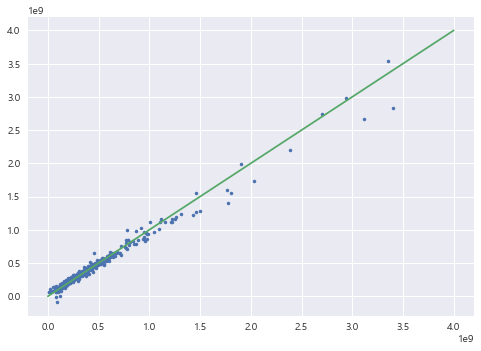

In [335]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 4000000000, 100) #튜토리얼 코드에서 값 조정(안하면 라인이 안뜸)
y = x
plt.plot(x, y)
plt.show()

## Beta, MSE 행렬식 활용하여 구현

## 1) Beta

In [336]:
from numpy.linalg import inv

In [337]:
#Beta 구하는 함수 구현
def estimate_beta(x, y):
    beta_hat = np.linalg.inv(x.T @ x) @ x.T @ y
    #task 1 참고
    return beta_hat

In [338]:
#행,열 개수 다시 확인
df_X.shape

(1879, 18)

In [339]:
#베타 추정 함수에 들어갈 행렬 만들기(X)
df_X_new = df_X
df_X_new['xzero'] = 1 #모든 값이 1인 열 추가

#행렬에서 1인 열은 맨 왼쪽에 위치해야하므로 데이터프레임 열 순서 바꿔서 다시 지정해주기(수작업말고 더 좋은 방법이 있을거 같습니다..)
df_X_new = pd.DataFrame(df_X_new, columns =['xzero', 'Claim_price', 'Auction_count', 'Total_land_gross_area',
       'Total_building_auction_area', 'Total_appraisal_price', 'addr_do',
       'Apartment_usage', 'Total_floor', 'Current_floor', 'Share_auction_YorN',
       'Auction_period', 'building_age', 'Current_total_ratio', 'Private',
       '기타', '제1금융권', '제2금융권', '제3금융권'])

#행렬식 계산을 위해 데이터 프레임 어레이로 지정(이거 안해줘도 된다고 하긴 하네요...)
X = np.array(df_X_new)
X

array([[1.00000000e+00, 1.76603730e+09, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.52946867e+08, 2.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.13265100e+07, 3.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 3.54805459e+08, 2.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.00000000e+07, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.80000000e+08, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [342]:
#Beta 값 확인
estimate_beta(X, y)

array([-4.61412083e+09,  2.79767876e-02, -7.92590179e+07,  3.86681025e+02,
       -6.13717305e+05,  1.06573031e+00, -2.65583792e+08, -8.41129939e+07,
        1.08433908e+06, -7.42201004e+06, -3.13891928e+08,  1.80128863e+05,
       -1.28256656e+05,  3.57031513e+07,  3.90960019e+09,  3.36428814e+09,
        3.06778032e+09,  2.72377057e+09,  3.45462963e+09])

In [343]:
#sklearn 내장함수 이용했던 결과와 비교
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[ 1.49622883e-03 -5.41927257e+07  3.74571130e+01 -1.46338375e+05
  9.18843401e-01  1.34792616e+07 -2.14584721e+07  7.20415400e+05
 -1.52589579e+06 -1.78824289e+07  5.40193843e+04  9.19209750e+05
  2.07743507e+07  5.69926319e+06 -2.65804645e+06  4.53119388e+06
 -2.16420737e+06 -5.40820324e+06]
96805875.09705734


## 2) MSE

In [344]:
#SSE는 error sum of squares(잔차제곱합)
SSE = np.sum((y - np.sum(X * estimate_beta(X,y), axis=1))**2)

# MSE는 SSE(잔차제곱합)을 n-k-1(자유도)로 나눈 값, 여기서 k는 설명변수를 뜻한다
MSE = SSE / (X.shape[0] -X.shape[1])

In [345]:
MSE

3.1311410273922893e+18

In [346]:
#sklearn 내장함수로 구한 MSE값과 비교

sk.metrics.mean_squared_error(y_train, model.predict(X_train))

5590921311457367.0